# Wait Time prediction system

## Patients data(Artificially created for demonstration)

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("../../data/cmtw.csv")
df = pd.read_csv("../../data/Book2.csv")

In [3]:
df.head()

,Name,Age,Mobile_Number,Disease_related_to_ear,Disease_related_to_eye,Disease_related_to_teeth,Patient_doesn't_appeared,Time_taken
0,bohemond,39,7751654875,0,1,0,0,3.25
1,bohen,50,8331177512,0,1,0,0,3.26
2,boheng,38,1564615646,0,1,0,0,4.00
3,bohl,53,1564234721,0,1,0,0,3.15
4,bohland,28,33840938409,0,1,0,0,4.32


In [28]:
df.shape

(179, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
Name                        179 non-null object
Age                         179 non-null int64
Mobile_Number               179 non-null int64
Disease_related_to_ear      179 non-null int64
Disease_related_to_eye      179 non-null int64
Disease_related_to_teeth    179 non-null int64
Patient_doesn't_appeared    179 non-null int64
Time_taken                  179 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 11.3+ KB


In [33]:
#sns.countplot(x='Age', hue="Patient_doesn't_appeared", data=df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F9EDA1470>,
      dtype=object)

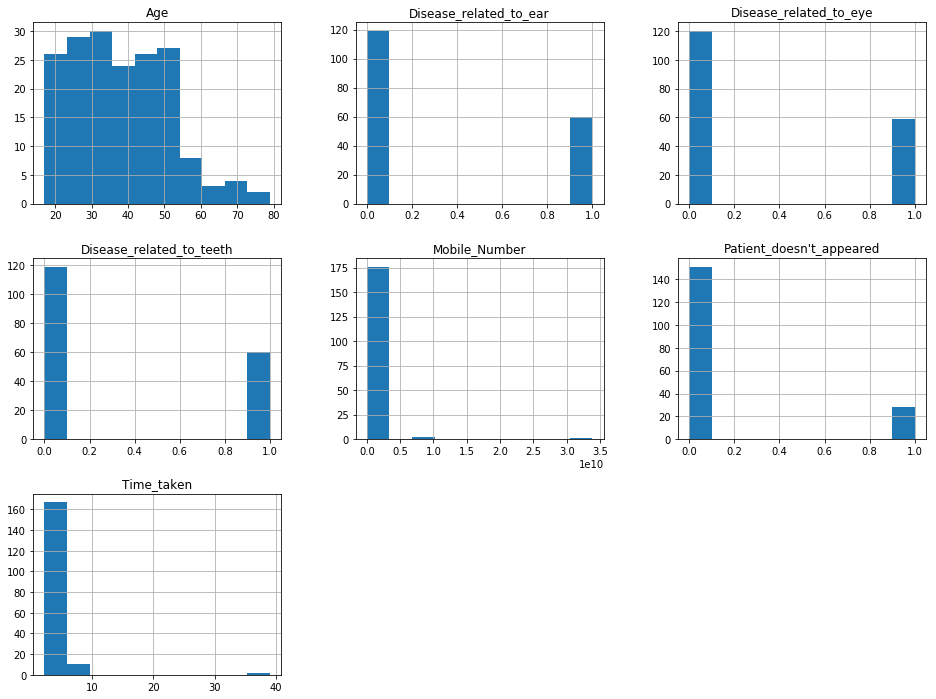

In [5]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop(['Name'], axis = 1).hist()

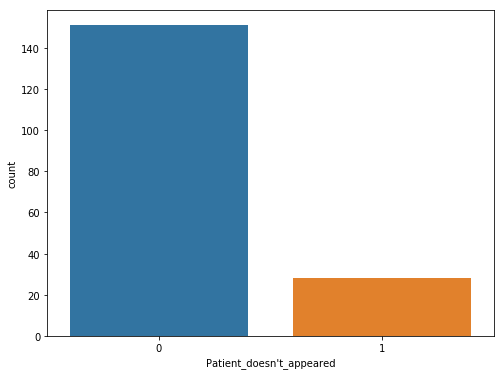

In [6]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = df["Patient_doesn't_appeared"], data = df)

In [7]:
#df["Patient_doesn't_appeared"].describe()
df["Time_taken"].describe()

count    179.000000
mean       4.555330
std        3.808568
min        2.210000
25%        3.400000
50%        4.100000
75%        4.700000
max       39.000000
Name: Time_taken, dtype: float64

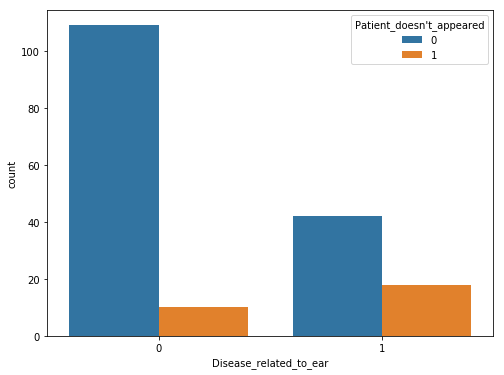

In [8]:
sns.countplot(x='Disease_related_to_ear', hue="Patient_doesn't_appeared", data=df);

In [9]:
df["Patient_doesn't_appeared"].value_counts()

0    151
1     28
Name: Patient_doesn't_appeared, dtype: int64

In [72]:
#0.1564 = 15.64% doesn't appear in opd

## Model creation using decision trees

In [10]:

#df["Patient_doesn't_appeared"] = df["Patient_doesn't_appeared"].astype('int')
names = df['Name']
mobile = df['Mobile_Number']
y = df["Patient_doesn't_appeared"]
df.drop(['Name','Mobile_Number',"Patient_doesn't_appeared"], axis=1, inplace=True)

In [11]:
#df.head()

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

### Machine Learning model's prediction

In [13]:
from sklearn.metrics import accuracy_score
from collections import Counter

tree_pred = tree.predict(X_holdout)
print(tree_pred)
print(Counter(tree_pred))
#accuracy_score(y_holdout, tree_pred) 


[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
Counter({0: 47, 1: 7})


### Prediction for patients who will be absent is 7 and time is calculated based on the formed algorithm below

In [16]:
# Average time taken by any of the patient
#df["Time_taken"].describe() mean = 4.555330

# if seven people didn't appeared then updated time will be 

# time = time - 7*4.55533    ---- =====>>         (time = time - 31.88731)

#### we got the result that 7 patients out of 180 have chances to not appear in opd after booking , 
#### So with the help of this system we can predict the time of particular patient and we can inform them 
#### by messaging them 

## ALGORITHMS THAT GOVERNS WORKING OF THE SYSTEM

#### let the machine machine learning model gives prediction(No. of patents that will not appear on the date of appointment) equal to n1 and the average time taken be t-avg
#### le
